# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 609


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hakui
Processing Record 2 of Set 1 | iqaluit
Processing Record 3 of Set 1 | pisco
Processing Record 4 of Set 1 | hermanus
Processing Record 5 of Set 1 | lata
Processing Record 6 of Set 1 | mahalapye
Processing Record 7 of Set 1 | hotan
Processing Record 8 of Set 1 | atafu village
Processing Record 9 of Set 1 | anadyr
Processing Record 10 of Set 1 | edinburgh of the seven seas
Processing Record 11 of Set 1 | tiksi
Processing Record 12 of Set 1 | piti village
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | longyearbyen
Processing Record 15 of Set 1 | isafjordur
Processing Record 16 of Set 1 | bethel
Processing Record 17 of Set 1 | ust-nera
Processing Record 18 of Set 1 | north lakhimpur
Processing Record 19 of Set 1 | kirensk
Processing Record 20 of Set 1 | colonia
Processing Record 21 of Set 1 | adamstown
Processing Record 22 of Set 1 | papao
Processing Record 23 of Set 1 |

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          582
Lat           582
Lng           582
Max Temp      582
Humidity      582
Cloudiness    582
Wind Speed    582
Country       582
Date          582
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hakui,36.8833,136.7833,305.75,66,70,2.37,JP,1722477166
1,iqaluit,63.7506,-68.5145,280.00,65,20,1.54,CA,1722477167
2,pisco,-13.7000,-76.2167,289.18,88,0,4.12,PE,1722477012
3,hermanus,-34.4187,19.2345,278.04,78,0,2.79,ZA,1722477169
4,lata,40.1629,-8.3327,292.64,88,100,2.14,PT,1722477170


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hakui,36.8833,136.7833,305.75,66,70,2.37,JP,1722477166
1,iqaluit,63.7506,-68.5145,280.00,65,20,1.54,CA,1722477167
2,pisco,-13.7000,-76.2167,289.18,88,0,4.12,PE,1722477012
3,hermanus,-34.4187,19.2345,278.04,78,0,2.79,ZA,1722477169
4,lata,40.1629,-8.3327,292.64,88,100,2.14,PT,1722477170


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

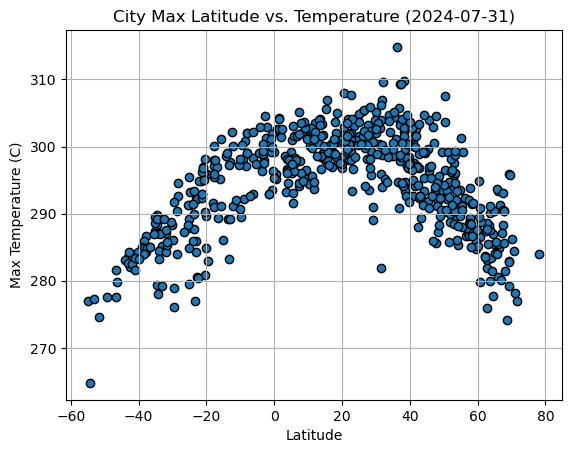

In [15]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]
plt.scatter(x_values, y_values, edgecolors = "black")

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs. Temperature (2024-07-31)")
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

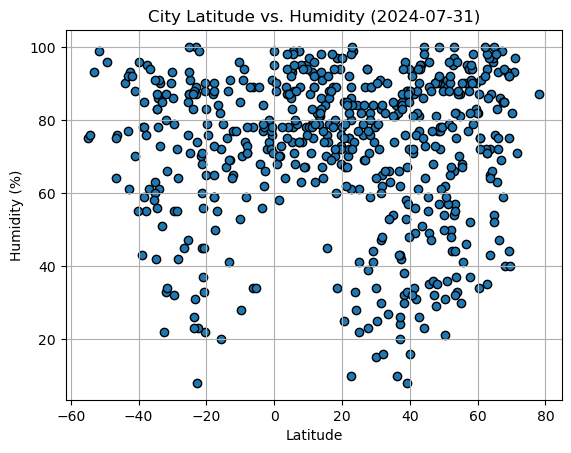

In [18]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]
plt.scatter(x_values, y_values, edgecolors = "black")

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2024-07-31)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

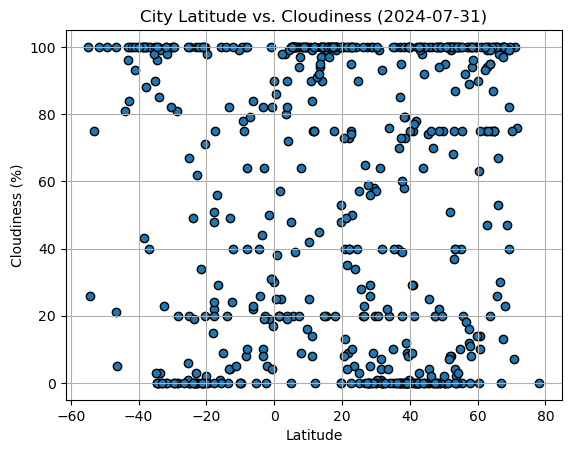

In [20]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]
plt.scatter(x_values, y_values, edgecolors = "black")

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (2024-07-31)")


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

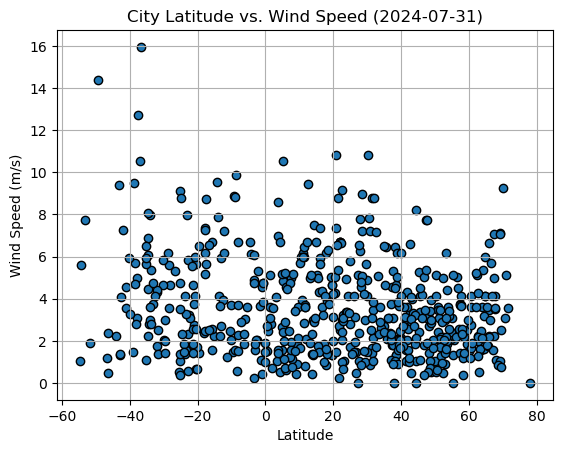

In [22]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]
plt.scatter(x_values, y_values, edgecolors = "black")

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2024-07-31)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [80]:
# Define a function to create Linear Regression plots
def create_linear_regression_plot(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    lin_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(lin_eq, (0.05, 0.85), xycoords="axes fraction", fontsize = 15, color = "red")
    print(f"The r-squared value is: {rvalue**2}")
    plt.show()

In [81]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hakui,36.8833,136.7833,305.75,66,70,2.37,JP,1722477166
1,iqaluit,63.7506,-68.5145,280.00,65,20,1.54,CA,1722477167
4,lata,40.1629,-8.3327,292.64,88,100,2.14,PT,1722477170
6,hotan,37.0997,79.9269,303.75,24,100,3.77,CN,1722477172
8,anadyr,64.7500,177.4833,285.43,100,75,6.00,RU,1722476998


In [82]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,pisco,-13.7000,-76.2167,289.18,88,0,4.12,PE,1722477012
3,hermanus,-34.4187,19.2345,278.04,78,0,2.79,ZA,1722477169
5,mahalapye,-23.1041,26.8142,285.93,87,3,7.96,BW,1722477171
7,atafu village,-8.5421,-172.5159,300.78,74,100,9.85,TK,1722477173
9,edinburgh of the seven seas,-37.0676,-12.3116,284.99,61,40,10.55,SH,1722477176


###  Temperature vs. Latitude Linear Regression Plot

The r-squared value is: 0.4258190879598275


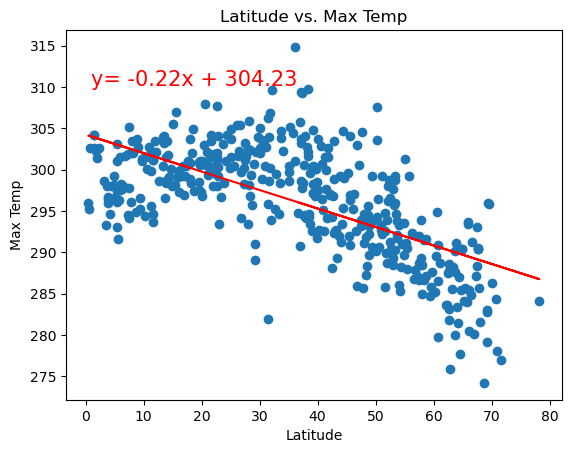

In [84]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plt.scatter(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Latitude vs. Max Temp")
create_linear_regression_plot(x_values, y_values)

The r-squared value is: 0.6497944657765837


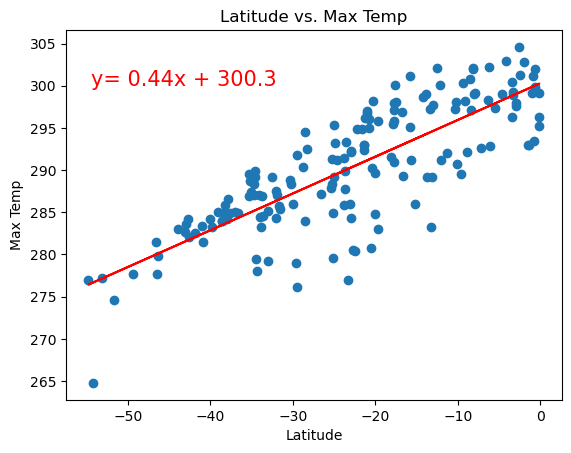

In [85]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plt.scatter(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Latitude vs. Max Temp")
create_linear_regression_plot(x_values, y_values)

**Discussion about the linear relationship:** There is somewhat a positive linear relationship for the southern hemisphere while there is a positive linear relationship in the northern hemisphere. The r-squared value isn't high enough in order to say it is a strong relationship. This means as latitude increase for the southern hemisphere max temp increases. While for the northern hemisphere as latitude increases max temp decreases. 

### Humidity vs. Latitude Linear Regression Plot

The r-squared value is: 0.008500002863663906


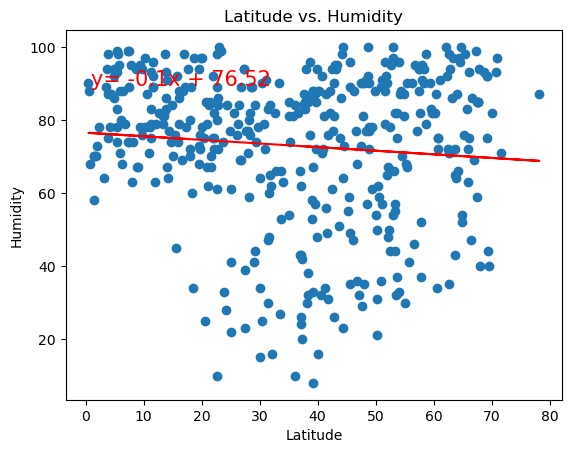

In [86]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plt.scatter(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs. Humidity")
create_linear_regression_plot(x_values, y_values)

The r-squared value is: 0.0016988195090928068


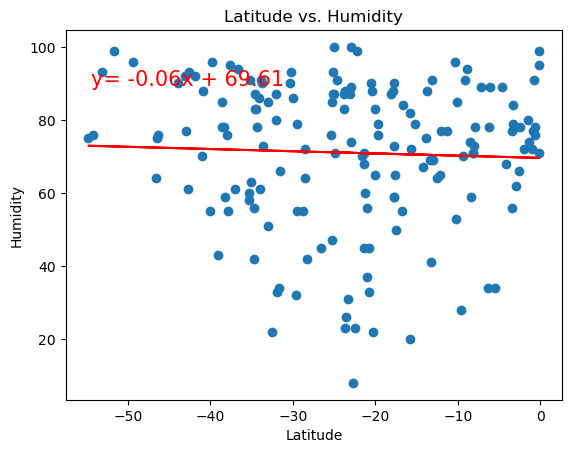

In [87]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plt.scatter(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs. Humidity")
create_linear_regression_plot(x_values, y_values)

**Discussion about the linear relationship:** There is not a strong linear relationship due to the very weak r-squared values alhtough the linear regression lines do appear similar. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared value is: 0.003259320886195936


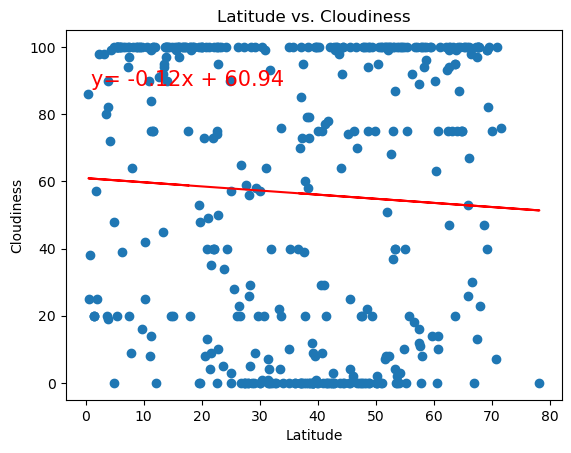

In [88]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plt.scatter(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs. Cloudiness")
create_linear_regression_plot(x_values, y_values)

The r-squared value is: 0.08490869056738025


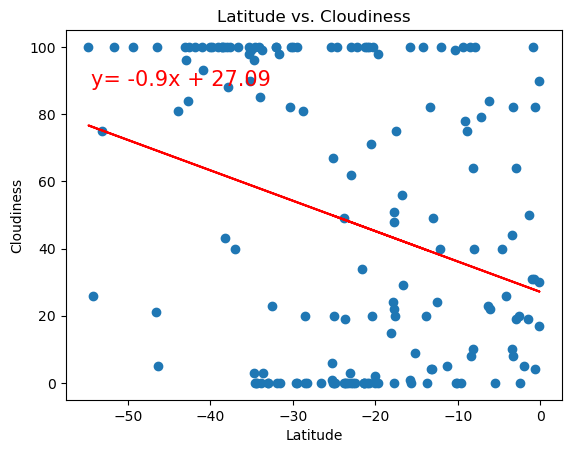

In [89]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plt.scatter(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs. Cloudiness")
create_linear_regression_plot(x_values, y_values)

**Discussion about the linear relationship:** The data here seems too spread out in order for there to be a linear relationship which is supports by our small r-squared value.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared value is: 0.017628785907392634


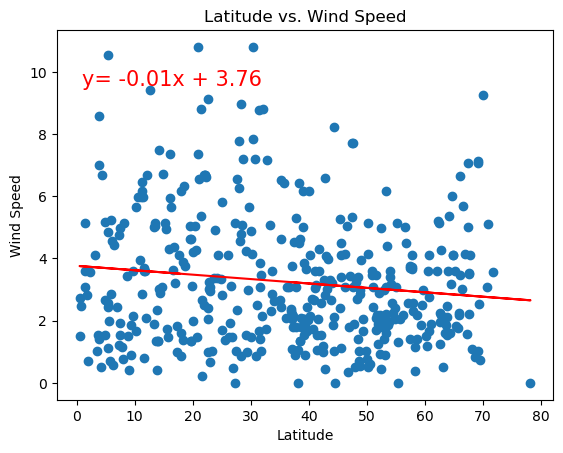

In [90]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plt.scatter(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs. Wind Speed")
create_linear_regression_plot(x_values, y_values)

The r-squared value is: 0.025087507779882817


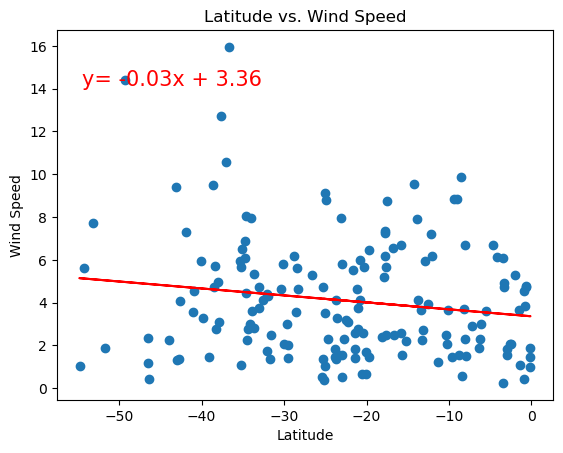

In [91]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plt.scatter(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs. Wind Speed")
create_linear_regression_plot(x_values, y_values)

**Discussion about the linear relationship:** The data here does seem to be more clustered however the r-squared value is way too small to consider a linear relationship